In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import math
%matplotlib inline
pd.__version__

u'0.22.0'

# TRATAMIENTO DE DATOS
Lectura de datos y modificacion para proximo analisis

In [5]:
d = pd.read_csv("diamonds.csv")

In [6]:
d.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
print d['color'][:20]

0     E
1     E
2     E
3     I
4     J
5     J
6     I
7     H
8     E
9     H
10    J
11    J
12    F
13    J
14    E
15    E
16    I
17    J
18    J
19    J
Name: color, dtype: object


### Modificacion de Datos

In [8]:
cut = {'Ideal': 5 ,'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
color = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E' : 6, 'D' : 7}
clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
d.color.replace(color, inplace=True)
d.cut.replace(cut,inplace=True)
d.clarity.replace(clarity,inplace=True)

In [9]:
d.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamond = d.drop(d.columns[0], axis='columns')

In [11]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
print type (diamond)

<class 'pandas.core.frame.DataFrame'>


In [13]:
diamond1 = diamond[['carat','cut','color','clarity','depth','table','x','y','z','price']]

## Dataset totalmente modificado para analizar

In [14]:
diamond1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,326
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,327
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,334
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,335


### Valores "X" y etiquetas "Y"

In [15]:
X = diamond1.values[:,:-1]
y = diamond1.values[:,-1]

## Matriz de correlaciones

En la matriz se evidencia que en los datos no existe ningun tido de correlacio para ninguno de los datos

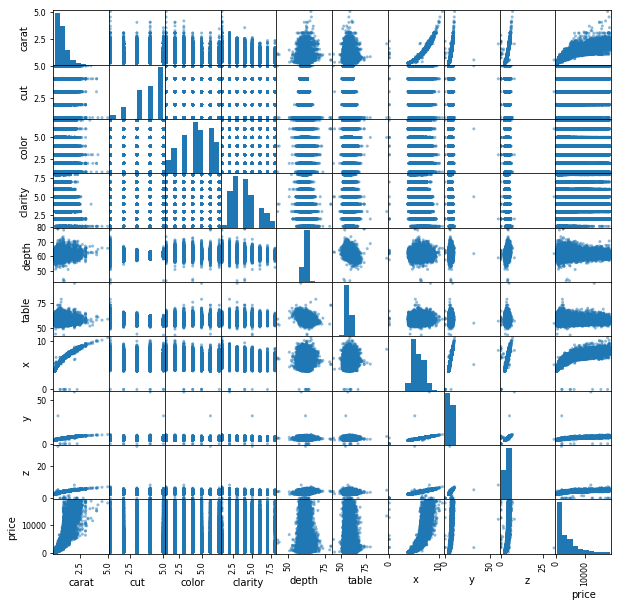

In [81]:
pd.plotting.scatter_matrix(diamond1, figsize=(10,10));

# Entrenamiento y resultados

Se entreno un DesicionTreeRegressor con un maximo de profundidad del arbol de 11.

In [16]:
DTR = DecisionTreeRegressor(max_depth = 11)
s = cross_val_score(DTR, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
raiz = np.sqrt(np.mean(s))
raiz2 = np.sqrt(np.std(s))
print "RMSE %.3f (+/- %.5f)"%(raiz,raiz2)

MSE 378528.602 (+/- 21277.21660)
RMSE 615.247 (+/- 145.86712)


In [17]:
RFR = RandomForestRegressor(max_depth = 11, n_estimators = 12)
s = cross_val_score(RFR, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
raiz = np.sqrt(np.mean(s))
raiz2 = np.sqrt(np.std(s))
print "RMSE %.3f (+/- %.5f)"%(raiz,raiz2)

MSE 306206.882 (+/- 16243.51403)
RMSE 553.360 (+/- 127.45005)


# Separacion de datos para train y test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print X_train

[[1.01 4.   6.   ... 6.47 6.37 4.04]
 [0.35 5.   7.   ... 4.53 4.56 2.81]
 [2.16 4.   3.   ... 8.29 8.22 5.14]
 ...
 [1.5  3.   5.   ... 7.39 7.48 4.5 ]
 [2.01 3.   4.   ... 7.94 8.03 4.96]
 [0.92 5.   5.   ... 6.26 6.3  3.85]]


## Score DesicionTreeRegressor

In [19]:
DTR.fit(X_train,y_train)
print "acierto en train", DTR.score(X_train, y_train)
print "acierto en test ", DTR.score(X_test, y_test)

acierto en train 0.9850662045089889
acierto en test  0.9757493853379711


## Score RandomForestRegressor

In [20]:
RFR.fit(X_train,y_train)
print "acierto en train", RFR.score(X_train, y_train)
print "acierto en test ", RFR.score(X_test, y_test)

acierto en train 0.9873320554860012
acierto en test  0.9802984114952935
